In [ ]:
#Generate Your Data
import csv
import random

data_rows=[
    ["ID","Name","Score"],
    ["1", "Alice", "85"],
    ["2", "Bob", "90"],
    ["3", "Charlie", "78"],
    ["4", "David", "92"],
    ["5", "Eva", "88"],
    ["1", "Alice", "85"],
    ["6", "Frank", ""],
    ["7","Eve","invalid"]
]

with open("raw_data.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(data_rows)

expense_rows=[
    ["Date","Category","Amount","Description"],
    ["2023-01-01", "Food", "15.50", "Lunch"],
    ["2023-01-05", "Rent", "1200.00", "Monthly Rent"],
    ["2023-01-07", "Food", "45.00", "Groceries"],
    ["2023-01-10", "Transport", "20.00", "Gas"],
    ["2023-01-15", "Food", "12.00", "Coffee"],
    ["2023-01-20", "Transport", "35.00", "Uber"],
    ["2023-02-01", "Rent", "1200.00", "Monthly Rent"],
]

with open("expenses.csv","w",newline="") as f:
    writer=csv.writer(f)
    writer.writerows(expense_rows)

print("Files 'raw_data.csv' and 'expenses.csv' created successfully!")

Files 'raw_data.csv' and 'expenses.csv' created successfully!


In [ ]:
#Data File Processor (CLI Tool)
import csv
import os

def process_data(file_path):
    seen_ids=set()
    valid_scores=[]
    print(f"--- Processing file: {file_path} ---")
    try:
        with open(file_path,mode='r')as f:
            reader=csv.DictReader(f)

            for row in reader:
                user_id=row['ID']
                score_str=row['Score']
                if user_id in seen_ids:
                    print(f"Skipping duplicate ID: {user_id}")
                    continue
                seen_ids.add(user_id) 

                if not score_str:
                    print(f"Missing score for ID: {user_id}")
                    continue
                try:
                    score=float(score_str)
                    valid_scores.append(score) 
                except ValueError:
                    print(f"Invalid score '{score_str}' for ID: {user_id}")

            if valid_scores:
                avg_score= sum(valid_scores)/len(valid_scores)
                print("-"*30)
                print(f"Total Valid Records:{len(valid_scores)}")
                print(f"Average Score:{avg_score:.2f}") 
            else:
               print("No valid scores found.")          

    except FileNotFoundError:
        print("Error: the file not found.")
if __name__=="__main__":
    process_data("raw_data.csv")                            
                          

--- Processing file: raw_data.csv ---
Skipping duplicate ID: 1
Missing score for ID: 6
Invalid score 'invalid' for ID: 7
------------------------------
Total Valid Records:5
Average Score:86.60


--- Analyzing expenses.csv ---

Expense Summary by Category:
Category
Food           72.5
Rent         2400.0
Transport      55.0
Name: Amount, dtype: float64


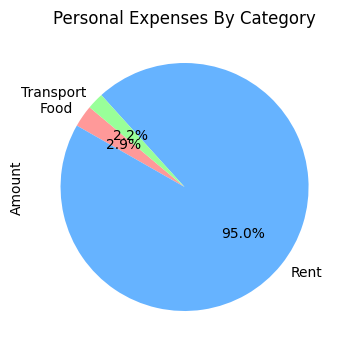

In [ ]:
#Personal Expense Analyzer
import pandas as pd 
import matplotlib.pyplot as plt


def analyze_expenses(file_path):
    print(f"--- Analyzing {file_path} ---")

    try:
        df=pd.read_csv(file_path)
        df['Date']=pd.to_datetime(df['Date'])
        df['Amount'] = pd.to_numeric(df['Amount'],errors='coerce')
        df.dropna(subset=['Amount'],inplace=True)
        category_summary=df.groupby('Category')['Amount'].sum()
        print("\nExpense Summary by Category:")
        print(category_summary)
        plt.figure(figsize=(4,8))
        category_summary.plot(
            kind='pie',
            autopct='%1.1f%%',
            startangle=140,
            colors=['#ff9999','#66b3ff','#99ff99']
        )
        plt.title('Personal Expenses By Category')
        plt.ylabel('Amount')
        plt.show()

    except FileNotFoundError:
        print("Error: the file not found.") 

if __name__=="__main__":
    analyze_expenses("expenses.csv")        




#------------Statistics and probablity------------#


In [14]:
#Generate data 

import pandas as pd
import numpy as np
from datetime import datetime,timedelta

np.random.seed(42)
n_samples=1000

control_conversions =np.random.binomial(n=1,p=0.10,size=n_samples)#10% chance
treatment_conversions=np.random.binomial(n=1,p=0.13,size=n_samples)#13% chance

ab_df=pd.DataFrame({
    'group':['control']*n_samples+['treatment']*n_samples,
    'converted':np.concatenate([control_conversions,treatment_conversions])

})

ab_df.to_csv('ab_data.csv',index=False)

dates=[datetime(2023,1,1)+timedelta(days=x) for x in range (365)]
categories=['Electronics','Clothing','Home']
sales_data=[]

for date in dates:
    seasonal_multiplier=1.5 if date.month ==12 else 1.0


    for cat in categories:
        sales =np.random.normal(loc=100,scale=20)* seasonal_multiplier

        customers=sales/2 + np.random.normal(10,5)

        sales_data.append([date,cat,round(sales,2),int(customers)])

sales_df=pd.DataFrame(sales_data,columns=['Date','Category','Sales','Customers'])
sales_df.to_csv('sales_data.csv',index=False)

print("Data files created successfully!")





Data files created successfully!


In [17]:
#A/B Test Analyzer

import pandas as pd
import numpy as np
from scipy import stats

def run_ab_test(file_path):
    print("---Running A/B Test Analysis---")

    df=pd.read_csv(file_path)
    control_data =df[df['group']=='control']['converted']
    treat_data =df[df['group']=='treatment']['converted']

    conv_con=control_data.mean()
    conv_treat=treat_data.mean()

    print(f"Control Conversion Rate:{conv_con:.2%}")
    print(f"Treatment Conversion Rate :{conv_treat:.2%}")

    t_stat,p_val=stats.ttest_ind(control_data,treat_data)
    print(f"\nP_value:{p_val:.4f}")

    alpha=0.05

    if p_val<alpha:
        print("RESULT:Statistically Significant!")
        print("Meaning:The new Website design actually works.")

    else:
       print("RESULT:Not Significant!")
       print("Meaning:The difference is likely just random noise")     


if __name__=="__main__":
    run_ab_test("ab_data.csv")

---Running A/B Test Analysis---
Control Conversion Rate:10.00%
Treatment Conversion Rate :13.10%

P_value:0.0301
RESULT:Statistically Significant!
Meaning:The new Website design actually works.


In [ ]:
#Sales Data Report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_sales(file_path):
    print("\n---Running Sales Statistical Report ---")

    df=pd.read_csv(file_path)
    df['Date']=pd.to_datetime(df['Date'])
    df['Month']= df['Date'].dt.month

    print("\n[Descriptive Statistics]")
    stats_summary=df.groupby('Category')['Sales'].describe()
    print(stats_summary[['mean','std','50%']])

    print("\n[Correlation Matrix]")
    correlation=df[['Sales','Customers']].corr()
    print(correlation)

    plt.figure(figsize=(10,5))

    sns.boxplot(x='Month',y='Sales',data=df)
    plt.title("Sales Distribution by Month")
    plt.xlabel("Month (1=Jan,12=Dec)")
    plt.ylabel("Sales Amount($)")

    plt.show()

if __name__=="__main__":
    analyze_sales("sales_data.csv")